In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Calibration 1 #

[0.016 0.016 0.016 ... 0.016 0.016 0.012]
Mean of Data: 0.019207904022582926 ± 0.007503758243269017 micro seconds
Mean of Fit: 0.017581075952584894 ± 0.00013777518904727274 micro secods
0.0038207667161581447
Chi square: 38.66874571297541, RCHi2: 1.7576702596807003
[2945. 2995. 2319. 1421.  604.  259.  102.]


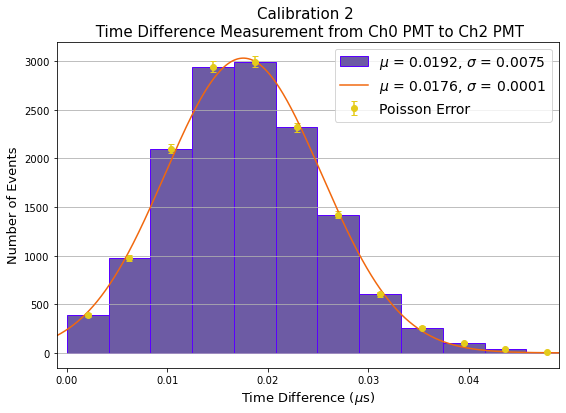

In [242]:
path = 'calibration/'
pathP = 'plots/'
time_calib = np.loadtxt(path + "timeCalib1.txt", skiprows = 4)

time_diff = time_calib.T[6]
time_diff = time_diff * 1e6
print(time_diff)

bins = 25
fig, ax = plt.subplots(figsize = (9,6))
h = ax.hist(time_diff, bins = bins, color = '#6d5ba4', edgecolor = '#5a00ff', label = rf'$\mu$ = {np.mean(time_diff):0.4f}, $\sigma$ = {np.std(time_diff):0.4f}') #microseconds
ax.set_title("Calibration 2 \n Time Difference Measurement from Ch0 PMT to Ch2 PMT", fontsize = 15)
ax.set_xlabel(r"Time Difference ($\mu$s)", fontsize = 13)
ax.set_ylabel("Number of Events", fontsize = 13)
ax.set_xlim(-.001,.049)

#fit to gaussian: 

def gauss(x, a, b, c):
    return a * np.exp( -1*(x - b)**2 /(2*c**2) )

bin_hights = h[0]
bin_edges = h[1]
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

####### poisson error ######
poisson_errhh = []
counts_hh = h[0]
edg_hh = h[1]
cent_hh = 0.5*(edg_hh[1:] + edg_hh[:-1])
for i in range(len(counts_hh)):
    if counts_hh[i] > 0: 
        poisson_errhh.append(np.sqrt(counts_hh[i]))
    else: 
        poisson_errhh.append(1)
#-------------------------   Plotting Error --------

ax.errorbar(cent_hh, counts_hh, yerr = poisson_errhh, fmt = "o", capsize = 3, color = '#e4cb1b', label = 'Poisson Error')
params, cov = curve_fit(gauss, bin_centers, bin_hights, sigma = poisson_errhh)
x = np.linspace(-.01,.49, len(time_diff))
ax.plot(x, gauss(x, *params), color = '#f1680e', label = rf"$\mu$ = {params[1]:0.4f}, $\sigma$ = {np.sqrt(cov[1][1]):0.4f}")
ax.grid(True, axis = 'y')

ax.legend(fontsize = 14)

error = np.std(time_diff) #1/np.sqrt(len(time_diff))
#sigma_t*np.mean(time_diff)*1e6
print(f"Mean of Data: {np.mean(time_diff)} ± {error} micro seconds")
print(f"Mean of Fit: {params[1]} ± {np.sqrt(cov[1][1])} micro secods")

#important for error in time measurement (how accurate the time measurement is)

plt.savefig(pathP + 'calib1')

sigma_t = (np.sqrt(cov[1][1]) + np.std(time_diff))/2

print(sigma_t)

#chi^2

expected = np.array(bin_hights[3:10])
observed = np.array(gauss(bin_centers[3:10], *params))
chi_2 = []
for i in range(len(bin_hights[3:10])):
    if expected[i] == 0:
        chi_2.append(0)
    else:
        chi_2.append( (observed[i] - expected[i])**2/expected[i] )
chi_2 = sum(chi_2)
reduced_chi2 = chi_2/(bins - 3)

print(f"Chi square: {chi_2}, RCHi2: {reduced_chi2}")

print(expected)


# Calibration 2 #

Slope of: 0.00 ± 0.00
0.03234764896051138
Slope of: 0.00 ± 0.00


Text(0.5, 0.98, 'Calibration 2')

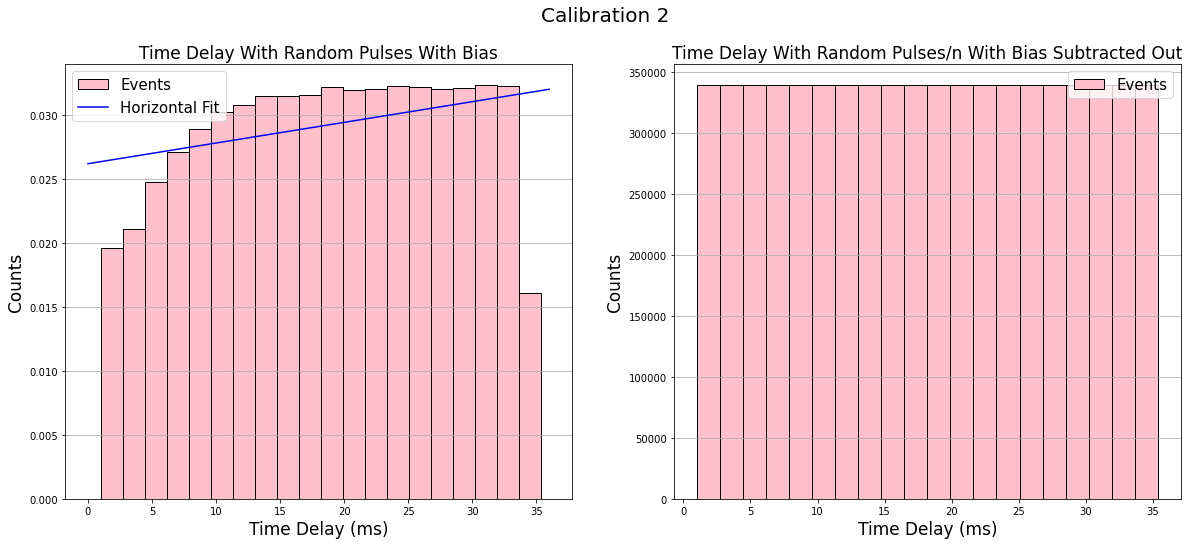

In [224]:
calib2 = np.loadtxt(path + "calibDig2_channel0_runOVN.txt", skiprows = 4)

time1 = calib2.T[0]
time2 = calib2.T[3]
delay = abs(time1 - time2) * 1e6 #ms
delay2 = []
for i in range(len(delay)):
    if delay[i] < 36:
        delay2.append(delay[i])

fig, (ax, ax2) = plt.subplots(1, 2, figsize = (20, 8))
h = ax.hist(delay2, bins = 20, color = 'pink', edgecolor = 'black', label = 'Events', density = True)
ax.set_title("Time Delay With Random Pulses With Bias", fontsize = 17)
ax.set_xlabel("Time Delay (ms)", fontsize = 17)
ax.set_ylabel("Counts", fontsize = 17)
ax.grid(True, axis = 'y')

#fitting
bin_hights = h[0]
bin_edges = h[1]
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

def horiz(x, m, b):
    return m*x + b

params, cov = curve_fit(horiz, bin_centers, bin_hights)
x = np.linspace(0, 36, len(delay2))
ax.plot(x, horiz(x, *params), color = "blue", label = "Horizontal Fit")

ax.legend(fontsize = 15)

print(f"Slope of: {params[0]:.2f} ± {(np.sqrt(cov[0][0])):.2f}")

print(max(bin_hights))

#get rid of bias
h2 = np.histogram(delay2, bins = 20)
ax2.set_title("Time Delay With Random Pulses/n With Bias Subtracted Out", fontsize = 17)
ax2.set_xlabel("Time Delay (ms)", fontsize = 17)
ax2.set_ylabel("Counts", fontsize = 17)
ax2.grid(True, axis = 'y')

bin_hights2 = h2[0]
bin_edges2 = h2[1]

ax2.hist(bin_edges2[:-1], bin_edges2, weights=bin_hights2/bin_hights, color = 'pink', edgecolor = 'black', label = 'Events')

#h2.BinCounts = h2.Values*[bin_hights]

bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

# params, cov = curve_fit(horiz, bin_centers, bin_hights)
# x = np.linspace(0, 36, len(delay2))
# ax2.plot(x, horiz(x, *params), color = "blue", label = "Horizontal Fit")

ax2.legend(fontsize = 15)

print(f"Slope of: {params[0]:.2f} ± {(np.sqrt(cov[0][0])):.2f}")

fig.suptitle("Calibration 2", fontsize = 20)

# Calibration 3: Time Delay (Testing Digitizer Clock) #

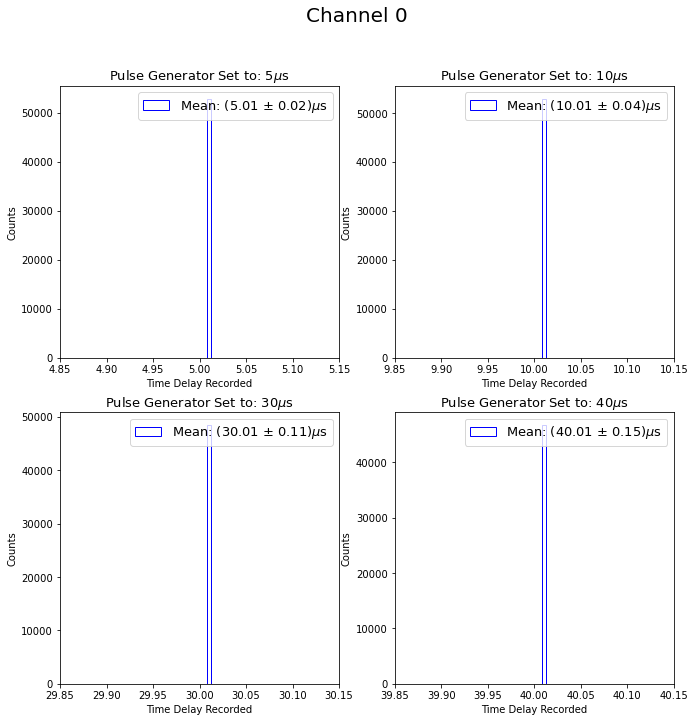

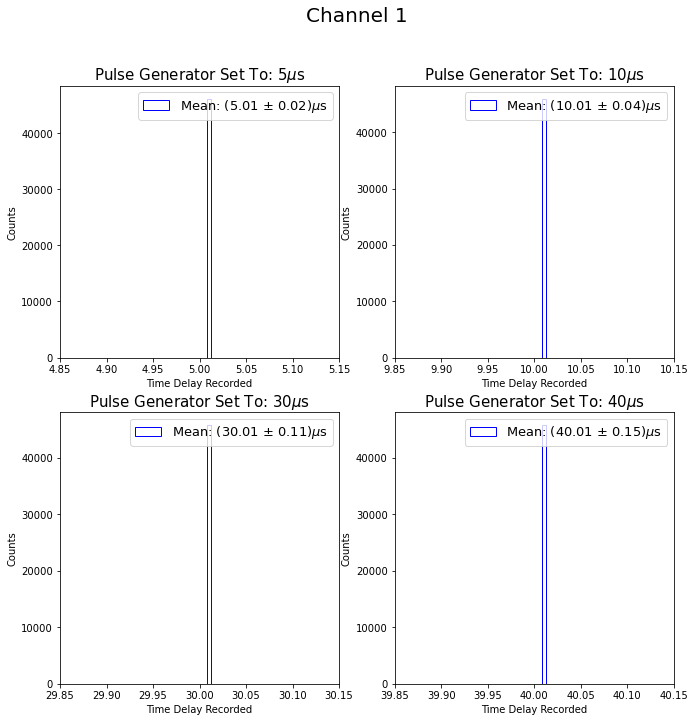

In [243]:
delay = [5, 10, 30, 40]

fig, axs = plt.subplots(2, 2, figsize= (11, 11))

#error in time for measurement: 
time_unc = 1/50

#for the channel 0
for i in range(len(delay)):
    calib3_ch0 = np.loadtxt(path + f"CalibDig3_{delay[i]}ms.txt", skiprows = 4)
    
    time1 = calib3_ch0.T[0]
    time2 = calib3_ch0.T[3]
    delay_ch0 = abs(time1 - time2) * 1e6 #ms
    
    #print(delay_ch0)
    
    ax = axs.flat[i]
    label = rf"Mean: ({(np.mean(delay_ch0)):.2f} ± {(sigma_t*np.mean(delay_ch0)):.2f})$\mu$s"
    ax.hist(delay_ch0, bins = 1, histtype = 'step', color = 'blue', label = label)
    ax.set_title(rf"Pulse Generator Set to: {delay[i]}$\mu$s", fontsize = 13)
    ax.set_ylabel("Counts")
    ax.set_xlabel(f"Time Delay Recorded")
    ax.set_xlim(delay[i] - .15, delay[i] + .15)
    ax.legend(fontsize = 13)

fig.suptitle("Channel 0", fontsize = 20)

plt.savefig(pathP + 'calib3_ch0')
    

fig, axs = plt.subplots(2, 2, figsize= (11,11))
#for the channel 1
for i in range(len(delay)):
    calib3_ch1 = np.loadtxt(path + f"CalibDig3_ch1_{delay[i]}ms.txt", skiprows = 4)
    
    time1_ch1 = calib3_ch1.T[6]
    time2_ch1 = calib3_ch1.T[9]
    delay_ch1 = abs(time1_ch1 - time2_ch1) * 1e6
    
    #print(delay_ch1)
    
    ax = axs.flat[i]
    label = rf"Mean: ({(np.mean(delay_ch1)):.2f} ± {(sigma_t*np.mean(delay_ch1)):.2f})$\mu$s"
    ax.hist(delay_ch1, bins = 1, histtype = 'step', color = 'blue', label = label)
    ax.set_title(rf"Pulse Generator Set To: {delay[i]}$\mu$s", fontsize = 15)
    ax.set_ylabel("Counts")
    ax.set_xlabel(f"Time Delay Recorded")
    ax.set_xlim(delay[i] - .15, delay[i] + .15)
    ax.legend(fontsize = 13)
fig.suptitle("Channel 1", fontsize = 20)

plt.savefig(pathP + "calib3_ch1")

# Calibration 4: Testing Digitizer ... #

Chi2 (ch0): 4.0854 for 5 points
Chi2 (ch1): 3.5954 for 5 points
Reduced ch0: 0.8171
Reduced ch1: 0.7191


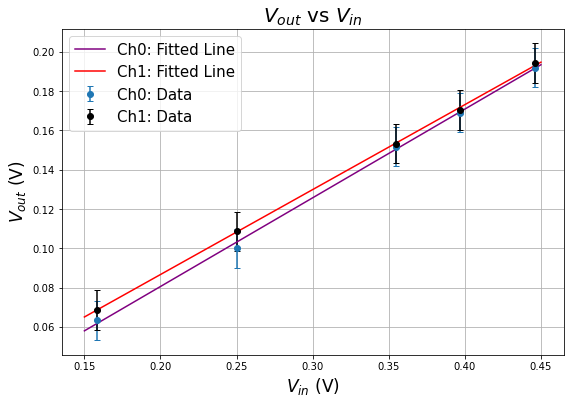

In [253]:
path = 'calibration/'

dB = [1, 2, 3, 6, 10]

vIn = [.446, .3968, .3546, .25, .158]
vOut_ch0 = []
vOut_ch1 = []
volt_err = 1/100 # a volt
for i in range(len(vIn)):
    data0 = np.loadtxt(path + f"calib4_ch0_{dB[i]}dB_500mV.txt", skiprows = 4)
    data1 = np.loadtxt(path + f"calib4_ch1_{dB[i]}dB_500mV.txt", skiprows = 4)
    
    voltage0 = data0.T[4]
    voltage1 = data1.T[10]
    
    vOut_ch0.append(np.mean(voltage0))
    vOut_ch1.append(np.mean(voltage1))

    
def line(x, m, b):
    return m*x + b

fig, ax = plt.subplots(figsize = (9, 6))
ax.set_title(r"$V_{out}$ vs $V_{in}$", fontsize = 20)
ax.set_xlabel(r"$V_{in}$ (V)", fontsize = 17)
ax.set_ylabel(r"$V_{out}$ (V)", fontsize = 17)
ax.errorbar(vIn, vOut_ch0, yerr = volt_err, fmt = "o", capsize = 3, label = "Ch0: Data")
ax.errorbar(vIn, vOut_ch1, yerr = volt_err, fmt = "o", capsize = 3, color = "black", label = "Ch1: Data")

#ax.scatter(vIn, vOut_ch0, label = "Channel 0 Data")

# size = 100
vin_arr = np.array(np.linspace(0.15, .45, len(vIn)))
# ax.plot(vin_arr, vin_arr/2, color = 'red', label = "Expected")

a = np.empty(len(vIn))
v_err = a.fill(volt_err)

#fit
params, cov = curve_fit(line, vIn, vOut_ch0, sigma = v_err)
ax.plot(vin_arr, line(vin_arr, *params), color = "purple", label = "Ch0: Fitted Line")

params1, cov1 = curve_fit(line, vIn, vOut_ch1, sigma = v_err)
ax.plot(vin_arr, line(vin_arr, *params1), color = "red", label = "Ch1: Fitted Line")

ax.legend(fontsize = 15)
ax.grid(True)

plt.savefig(pathP + 'calib4')

#chi-squared
expected1 = np.array(line(vin_arr, *params))
expected2 = np.array(line(vin_arr, *params1))
observed1 = np.array(vIn)
observed2 = np.array(vIn)

chi2_1 = sum( (observed1 - expected1)**2/expected1) #or devided by variance for weighted
chi2_2 = sum( (observed2 - expected2)**2/expected2)

print(f"Chi2 (ch0): {chi2_1:0.4f} for {len(vOut_ch0)} points")
print(f"Chi2 (ch1): {chi2_2:0.4f} for {len(vOut_ch1)} points")

rchi_1 = chi2_1/5 # degrees of freedom
rchi_2 = chi2_2/5

print(f"Reduced ch0: {rchi_1:0.4f}")
print(f"Reduced ch1: {rchi_2:0.4f}")


